In [ ]:
#import packages needed here
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, clear_output

# **Question 1**

Fibonacci sequence ($F_n$), is defined as a sequence of numbers such that each
number is the sum of two preceding ones starting from $0$ and $1$ ($F_0 = 0$ and
$F_1 = 1$). Hence, we have the following value at $n
^{th}$ position

$F_n = F_{n-1} + F_{n-2}$

Write a python function that takes the number of elements the user wants in
the generated Fibonacci sequence as a parameter. The function should return
the generated Fibonacci sequence when called. Hence,


*   For user input $n = 0$, function should return $[ ]$
*   For user input $n = 1$, function should return $[0]$
*   For user input $n = 2$, function should return $[0, 1]$
*   For user input $n = 3$, function should return $[0, 1, 1]$ .. and so on








In [ ]:
#Fibonacci Sequence Function
def Fibonacci(x):
  if x <= 0:
    return []
  else:
    sequence = [0,1]
    while len(sequence) < x:
      next = sequence[-1]+sequence[-2]
      sequence.append(next)
    return sequence

In [ ]:
#Create code for input from user
x = input('Enter the number of elements you want the Fibonacci Sequence to return: ')

#create a time delay for functionality to reduce confusion for users (big fan of time delays)
time.sleep(1)

#transform to integer to work in Fibonacci function properly
x = int(x)

#print results utilizing Fibonacci function
result = Fibonacci(x)
print('\n',result)

Enter the number of elements you want the Fibonacci Sequence to return: g


ValueError: ignored

In [ ]:
#I want to create another version that includes loops to avoid errors in the code in the
  # case that the user enters a non-number into the input box
def get_input(prompt):
  while True:
    user_input = input(prompt)
    try:
      num = int(user_input)
      return num
    except ValueError:
      print('Invalid input. Please enter a single valid integer.\n')
      time.sleep(1)

x = get_input('Enter the number of elements you want the Fibonacci Sequence to return: ')

time.sleep(1)

result = Fibonacci(x)
print('\n',result)

Enter the number of elements you want the Fibonacci Sequence to return: 4h
Invalid input. Please enter a single valid integer.

Enter the number of elements you want the Fibonacci Sequence to return: 9

 [0, 1, 1, 2, 3, 5, 8, 13, 21]


# **Question 2**

Write a function in python that takes a list of numbers from the user and returns
a different list which only contains those numbers from the original list that are
within the range $[µ − σ, µ + σ]$. Here $µ$ and $σ$ are the mean and standard
deviation of numbers in the original list.

In [ ]:
#Mental map for this problem
  #create input for user, list of any length of numbers
  #find the mean and standard deviation of the list of numbers provided
  #create a range from [mean-stdev, mean+stdev]
  #only returns numbers from the original list that fall within the above range.

#note: coding in error parameters to ensure errors don't impact runtime may be more difficult here

In [ ]:
def RangeReturn(num_list):
  mean = np.mean(num_list)
  stdev = np.std(num_list)
  lower_range = mean - stdev
  upper_range = mean + stdev
  #range = [lower_range, upper_range]
  #create range result that only outputs numnbers in range
  result = [num for num in num_list if lower_range <= num <= upper_range]

  return result

In [ ]:
#input any numbers, separate by spaces, split the input string into a list of integers
num_input = input('Enter a list of numbers. Please separate the numbers by spaces: \n')
numbers = [int(num) for num in num_input.split()]

#Create timesleep for functionality
time.sleep(1)

#Run input numbers through function, and print results.
result = RangeReturn(numbers)
print('\n',result)

Enter a list of numbers. Please separate the numbers by spaces: 
13 24 18 16 92 3000 420 367

 [13, 24, 18, 16, 92, 420, 367]


In [ ]:
#Once again, I wanted to recreate this problem with error padding to minimize runtime ending due to errors
def RangeReturn(prompt):
  while True:
    user_input = input(prompt)
    try:
      num_list = [int(num) for num in user_input.split()]
      mean = np.mean(num_list)
      stdev = np.std(num_list)
      lower_range = mean - stdev
      upper_range = mean + stdev
      #range = [lower_range, upper_range]
      #create range result that only outputs numnbers in range
      result = [num for num in num_list if lower_range <= num <= upper_range]
      return result
    except ValueError:
      print('Invalid input. Enter a list of numbers. Please separate the numbers by spaces: \n')
      time.sleep(1)

#run through code and produce results
RangeReturn('Enter a list of numbers. Please separate the numbers by spaces: \n')

Invalid input. Enter a list of numbers. Please separate the numbers by spaces: 



KeyboardInterrupt: ignored

# **Question 3**

Write a python function that takes an integer $(n)$ as an input and:

1. If the integer is less than $1$, the function should print an error message and return nothing
2. for other cases:

> (a) Returns a numpy array with a checkerboard pattern.
For example if user provides $n = 5$ to the function, then it should return the 5x5 array

\begin{array}{ccccc}
0&1&0&1&0\\
1&0&1&0&1\\
0&1&0&1&0\\
1&0&1&0&1\\
0&1&0&1&0\\
\end{array}


> (b) Plots the checkboard pattern as an image with grayscale colormap.



Enter a positive integer to denote the size of your checkerboard: 45


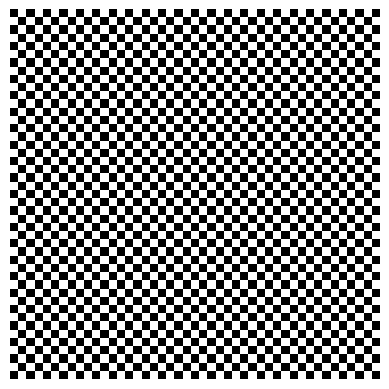

In [ ]:
#create function, allow user input, build in error padding to begin with.
def checkerboard(prompt):
  while True:
    try:
      n = int(input('Enter a positive integer to denote the size of your checkerboard: '))
      if n <= 0:
        raise ValueError('Invalid input. Please enter a positive integer.')
        time.sleep(1)

      #create empty checkerboard pattern
      board = np.zeros((n, n), dtype = int)

      #slice the array to alternate the input elements of ones into the empty array
      board[1::2, ::2] = 1
      board[::2, 1::2] = 1

      #build the checkerboard into a gray-scale pattern, turn off axis for ideal results
      plt.imshow(board, cmap='gray')
      plt.axis('off')
      plt.show()

      break

    #final error in the case that user inputs more than one number, or presses other keys like letters
    except ValueError:
      print('Invalid input. Please enter a single positive integer.\n')

#print prompt with function
checkerboard('Enter a positive integer to denote the size of your checkerboard: \n')

# **Question 4**

We want to understand the application of Central limit theorem to the dice throw experiment for a biased dice. For this:

1.  Generate a population of 1 million dice throws with each face probability as follows

\begin{array}{cccc}
Face&1&2&3&4&5&6\\
Probability&1/3&1/12&1/12&1/6&1/6&1/6
\end{array}

2.  Assuming a sample size of $n = 10000$, draw $m = 10000$ samples from the population with replacement.

3. Generate the histogram for $10000$ realizations of the random variable

>>$Z_m = \sqrt{n}*\frac{S_m - \mu}{\sigma}$

>>where $S_m$ is the average of all the dice faces included in a sample, $µ$ and $σ$
are the mean and standard deviation of the population for the dice throw
experiment. Additionally, overlay a pdf of a standard gaussian distribution
$(µ = 0, σ = 1)$ on the plotted histogram.

4. Fixing the sample size as $10000$, consider $4$ different cases of
different number of samples: $[100, 5000, 10000, 20000]$. For each of these
$4$ cases, make a similar histogram as you made in part 3 and plot these
histograms in 2x2 matplotlib subplot grid.

5. Explain in your own words what you observe in the plots in part 4 above.





## 4.1

In [ ]:
#Since I need to assign specific proabilities to each face of the dice, I need to define parameters before utilizing the random numbers
face = [1, 2, 3, 4, 5, 6]
prob = [1/3, 1/12, 1/12, 1/6, 1/6, 1/6]

#Find the cumulative total probailtiies to determine which face of the dice is selected based on probability value
total_prob = np.cumsum(prob)

#define number of throws
throws = 1000000
results = []

#run through randomization for loop
#Use _ for variable
for _ in range(throws):
  rand_throw = np.random.random()
  #intiialize the selected face of the die to no faces, will be selected in next for loop
  select_face = None

  #define selected face for each random dice throw
  for i, probability in enumerate(total_prob):
    if rand_throw <= probability:
      select_face = face[i]
      break
  #add results together into appended list
  results.append(select_face)

In [ ]:
#To check my work, I want to print the total number instances for each face
#Convert my throws results list into an array
results_array = np.array(results)

#Fine counts of unique instances of faces
faces, count = np.unique(results_array, return_counts = True)

#print results
for face, count in zip(faces, count):
  print(f'{face}: {count}')

1: 333858
2: 82967
3: 83174
4: 167024
5: 166554
6: 166423


## 4.2

In [ ]:
#assuming sample size n = 10000, number of instances in each sample
#replacement means putting the data points back into the population after they've been pulled
#number of samples, m = 10000, so I will be pulling 10000 samples with 10000 data points

In [ ]:
#n is sample size, m is number of samples
n = 10000
m = 10000

#create the 100000000 sample points in a 2D array
#note: this method produces results a lot faster than looping, which was my initial method
samples = np.random.choice(results, size = (m, n), replace = True)

In [ ]:
#check my work
#Print specific sample from the total sample set, and print the length to check that it is 10000
print(samples[344])
print(len(samples[344]))

[5 2 6 ... 1 2 3]
10000


## 4.3

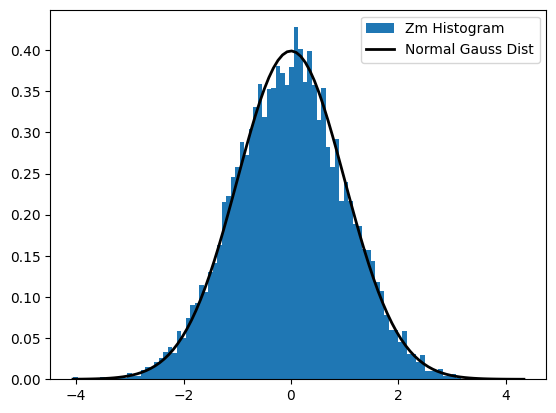

In [ ]:
#Find the values associated with the variables that are fixed
mu = np.mean(results)
sigma = np.std(results)
n = 10000

#Find the value of Sm, the average value of the dice faces in a sample
#This gives all 10,000 sample means
Sm = np.mean(samples, axis = 1)

#plug into the realizations function
Zm = np.sqrt(n) * (Sm - mu)/sigma

#generate histogram
plt.hist(Zm, bins = 100, density = True, label = 'Zm Histogram')

#Create the pdf overlay
x = np.linspace(min(Zm), max(Zm), 100)
#standard, mu = 0, sigma = 1
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, 'k-', lw = 2, label = 'Normal Gauss Dist')

#show plot
plt.legend()
plt.show()

## 4.4

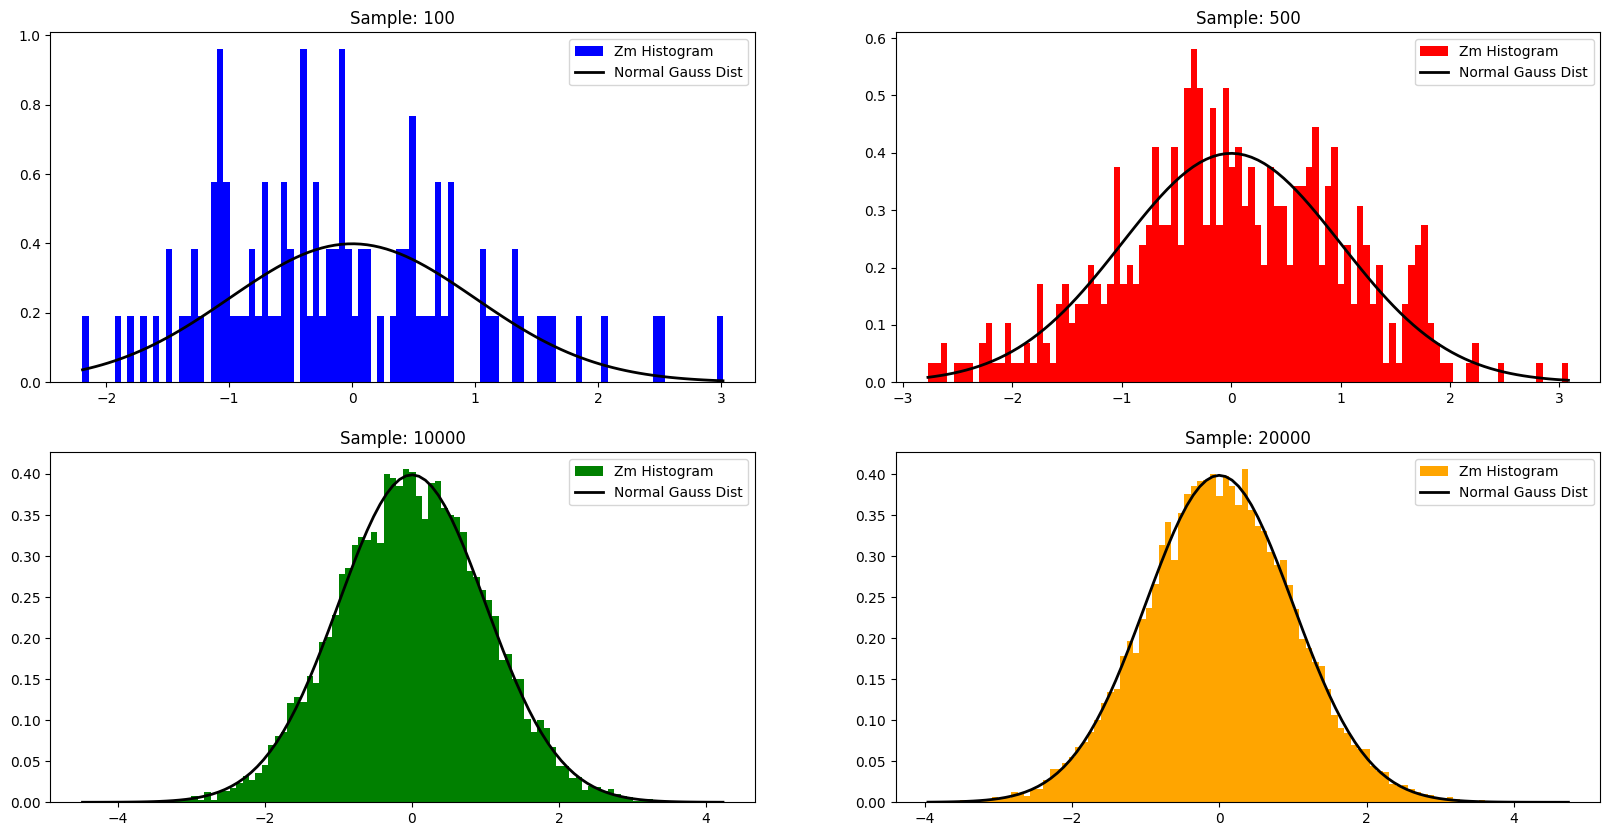

In [ ]:
mu = np.mean(results)
sigma = np.std(results)

#Create the four different sample numbers utilizing the fixed sample size
n = 10000 #sample size
#number of samples
sample_size = [100,500,10000,20000]

Sm_values = {}
plots = []

#create a figure for the subplots to be input into
fig, axes = plt.subplots(2, 2, figsize = (20,10))
#axes[row, col] will replace plt in the for loop of the code

colors = ['blue', 'red', 'green', 'orange']

#creat loop to run through same steps as above
for i, size in enumerate(sample_size):
  current_sample = np.random.choice(results, size = (size, n), replace = True)
  current_mean = np.mean(current_sample, axis = 1)
  Sm_values[f'Sample_{size}'] = current_mean

  #Calculate Zm in the loop
  Zm = np.sqrt(n) * (current_mean - mu)/sigma

  #build histogram, implement axes for the subplots
  row = i // 2
  col = i % 2
  axes[row, col].hist(Zm, bins = 100, density = True, color = colors[i], label = f'Zm Histogram')

  #create gaussian distribution overlay
  x = np.linspace(min(Zm), max(Zm), 100)
  gauss = norm.pdf(x, 0, 1)
  axes[row, col].plot(x, gauss, 'k-', lw = 2, label = 'Normal Gauss Dist')

  #graphs
  axes[row, col].set_title(f'Sample: {size}')
  axes[row, col].legend()

#show subplot graphs
plt.show()

## 4.5

In the above graphs, I notice a couple of distinct differences, similartiies, and trends. Generally, the graphs are following a normal distribution, it is difficult to even tell in the Sample: 100 graph, but to the trained eye you can see a slight normal distribution. As the number of samples increases, the historgrams tend to fit a more and more normal distribution. This makes perfect sense in regards to statistics, as under-sampling will lead to less normal, or biased results compared to the total population. The samples on the bottom, of 10,000 and 20,000, align more with our first historgram.